# Importing Data
The dataset used for model building contained 10999 observations of 12 variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\BIA\Ecom 2 - Bhagyalakshmi Muske\Train-data.csv')

# The data contains the following attributes:

<li>1 - ID: ID Number of Customers.</li>
<li>2 - Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.</li>
<li>3 - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.</li>
<li>4 - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.</li>
<li>5 - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).</li>
<li>6 - Cost of the product: Cost of the Product in US Dollars.</li>
<li>7 - Prior purchases: The Number of Prior Purchase.</li>
<li>8 - Product importance: The company has categorized the product in the various parameter such as low, medium, high.</li>
<li>9 - Gender: Male and Female.</li>
<li>10 - Discount offered: Discount offered on that specific product.</li>
<li>11 - Weight in gms: It is the weight in grams.</li>
<li)12 - Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
df.shape

(10999, 12)

# Cleaning Data

In [6]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# We found that there is no missing values in our data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Lets drop the irrelevant columns
Here I find ID column is not as much relevant for analyzing data  

In [8]:
df.drop(["ID"], axis = 1, inplace = True)

In [9]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Handling Outliers


In [10]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# It seems like there is outlier in Weight_in_gms column lets try to check in boxplot and also by using Interquartile Range

<Axes: >

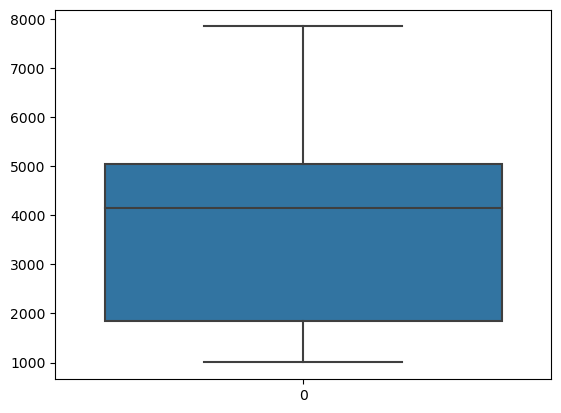

In [11]:
sns.boxplot(df["Weight_in_gms"])

<Axes: xlabel='Weight_in_gms', ylabel='Count'>

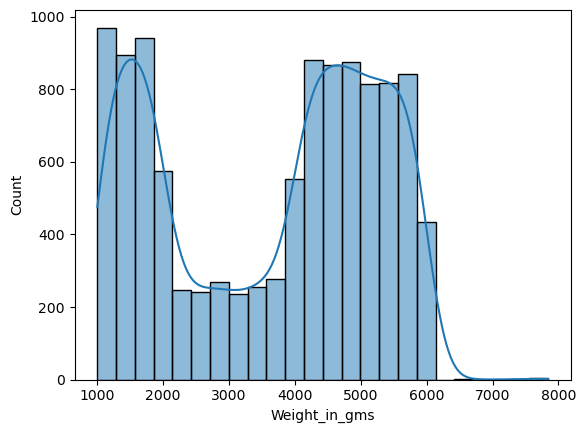

In [12]:
sns.histplot(data = df["Weight_in_gms"], kde = True)

In [13]:
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

df[df['Weight_in_gms']>(Q3+(1.5*IQR))]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


# As we can see in the plots there's no outliers in this column
So here i can conclude that there is no outliers in our data

# Lets visualize the data with the target class and bring out some key insights 

In [14]:
#sns.pairplot(df)

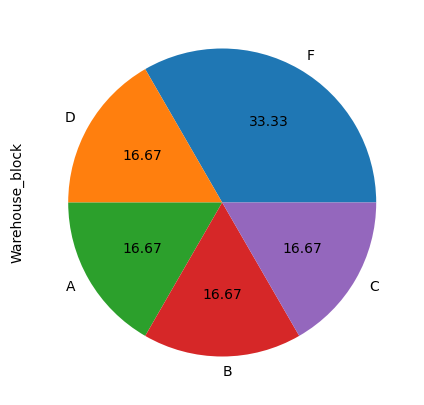

In [15]:
plt.figure(figsize=(5, 5))
df['Warehouse_block'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

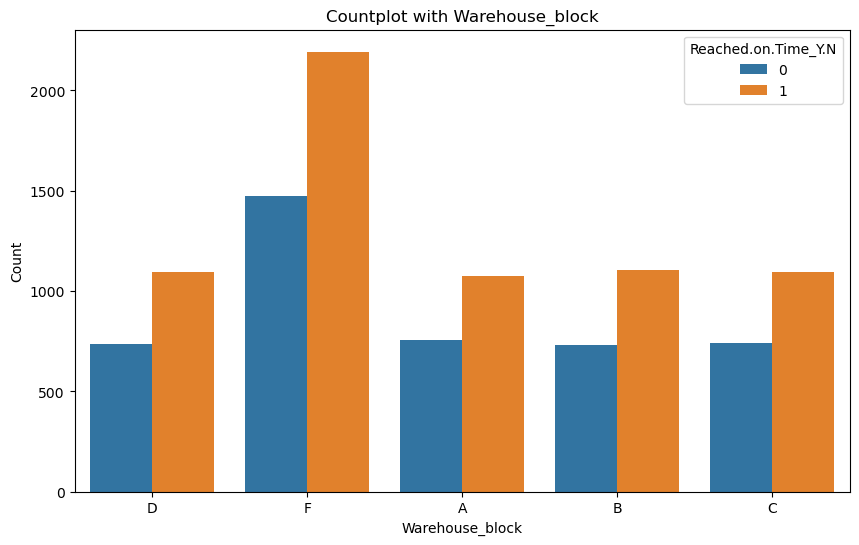

In [16]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Warehouse_block', hue='Reached.on.Time_Y.N')

plt.title('Countplot with Warehouse_block')
plt.xlabel('Warehouse_block')
plt.ylabel('Count')

plt.show()

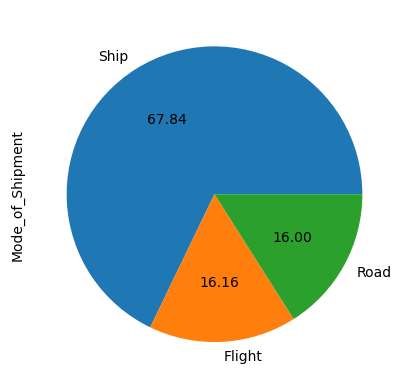

In [17]:
df['Mode_of_Shipment'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

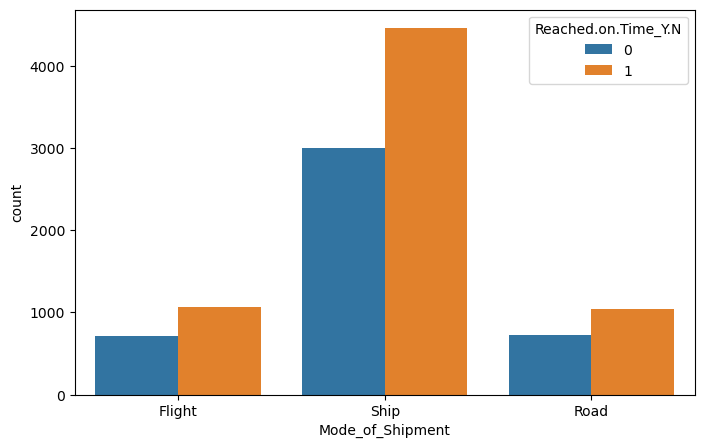

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Mode_of_Shipment')
plt.show()

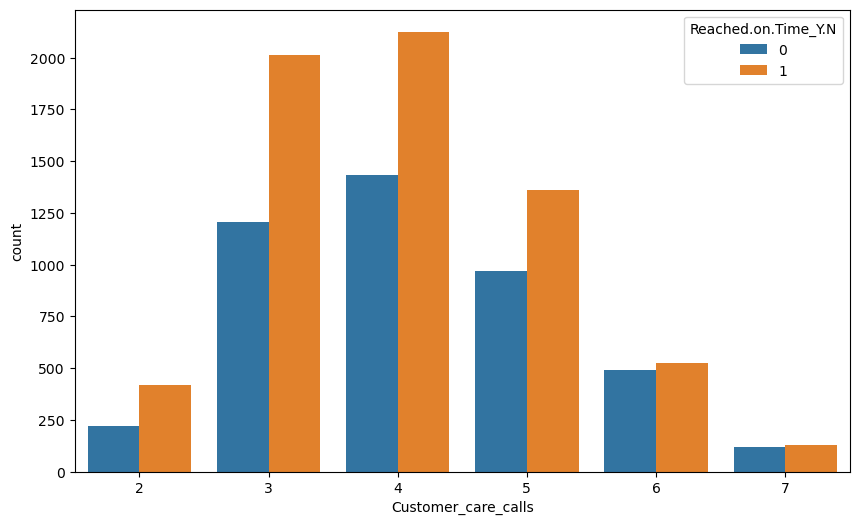

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Customer_care_calls')
plt.show()

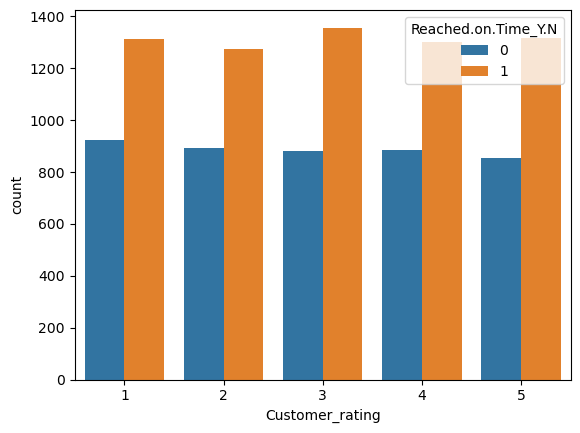

In [20]:
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Customer_rating')
plt.show()

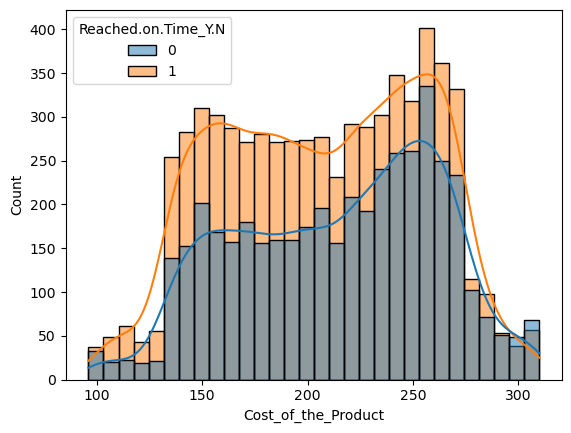

In [21]:
sns.histplot(data=df, x="Cost_of_the_Product", hue="Reached.on.Time_Y.N", kde=True)

plt.show()

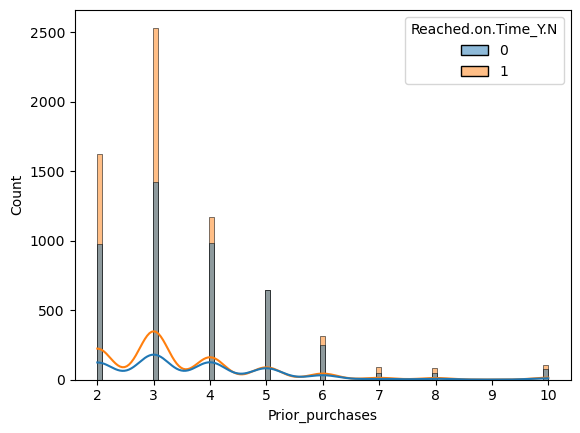

In [22]:
sns.histplot(data=df, x="Prior_purchases", hue="Reached.on.Time_Y.N", kde=True)

plt.show()

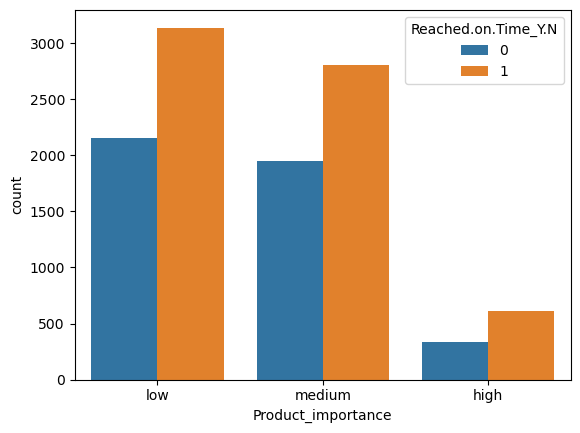

In [23]:
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Product_importance')
plt.show()

In [24]:
value_counts = df['Gender'].value_counts()
proportions = value_counts / len(df)

print("\nProportions:")
print(proportions)



Proportions:
F    0.504137
M    0.495863
Name: Gender, dtype: float64


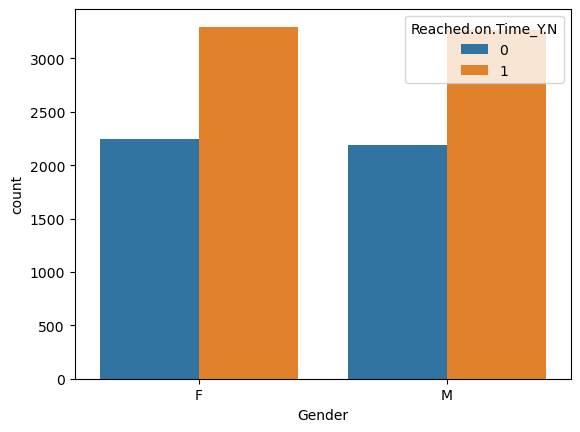

In [25]:
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Gender')
plt.show()

# As i can see the Gender column is equal in our data. Also both the gender's product arrived late is more than delivered on time.  

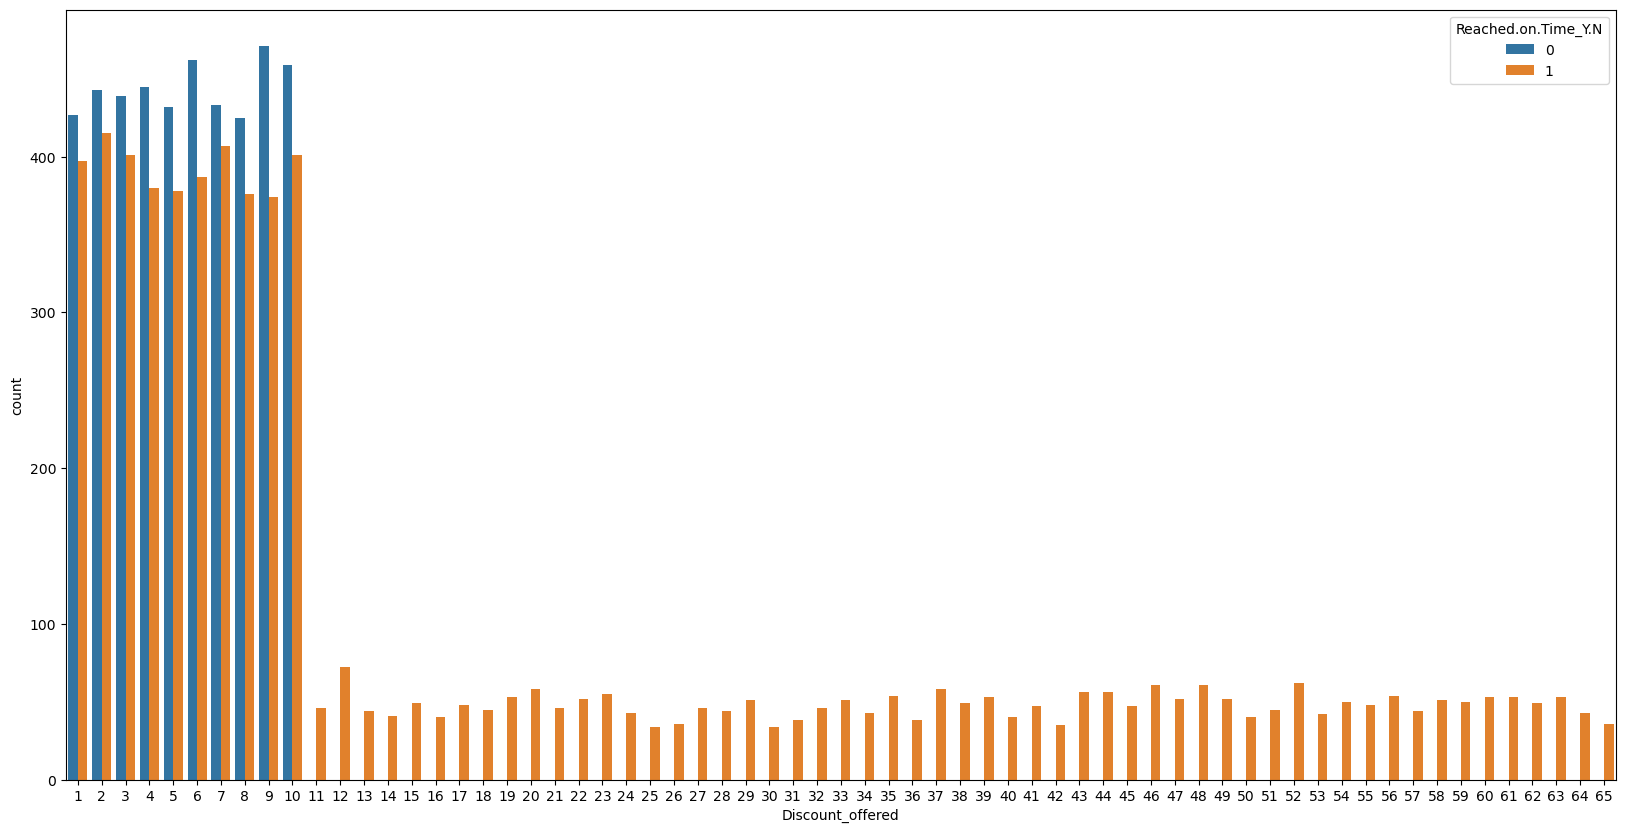

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, hue='Reached.on.Time_Y.N', x='Discount_offered')
plt.show()

# Here in the above plot i can see that after Discount Offered on products delivery on time tends to rise. 

<Axes: xlabel='Weight_in_gms', ylabel='Count'>

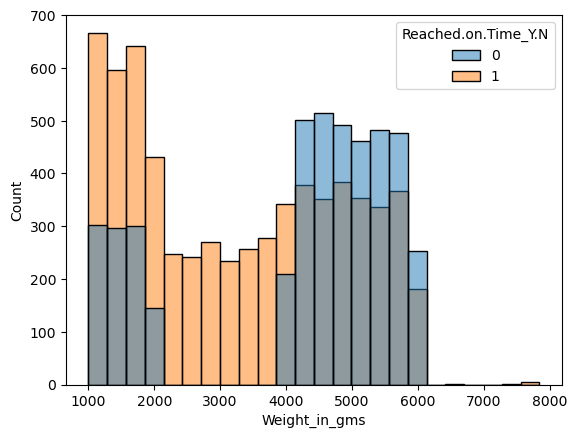

In [27]:
sns.histplot(data=df, x="Weight_in_gms",hue="Reached.on.Time_Y.N")

# In the above histplot weight between 4000-6000gms delivery on time is more than delivery did not reached on time.

In [28]:
value_counts = df['Reached.on.Time_Y.N'].value_counts()
proportions = value_counts / len(df)

print("\nProportions:")
print(proportions)


Proportions:
1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64


# Now I will try to convert categorical columns into numeric in this i will use One Hot Encoding.

In [29]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance'])

In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        10999 non-null  int64
 1   Customer_rating            10999 non-null  int64
 2   Cost_of_the_Product        10999 non-null  int64
 3   Prior_purchases            10999 non-null  int64
 4   Discount_offered           10999 non-null  int64
 5   Weight_in_gms              10999 non-null  int64
 6   Reached.on.Time_Y.N        10999 non-null  int64
 7   Gender_F                   10999 non-null  uint8
 8   Gender_M                   10999 non-null  uint8
 9   Warehouse_block_A          10999 non-null  uint8
 10  Warehouse_block_B          10999 non-null  uint8
 11  Warehouse_block_C          10999 non-null  uint8
 12  Warehouse_block_D          10999 non-null  uint8
 13  Warehouse_block_F          10999 non-null  uint8
 14  Mode_of_Shipment_Fligh

In [31]:
df_encoded

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_F,Gender_M,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,44,1233,1,1,0,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,59,3088,1,0,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,48,3374,1,0,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,10,1177,1,0,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,46,2484,1,1,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,1,0,0,0,0,0,0,1,0,0,1
10995,4,1,232,5,6,1247,0,1,0,0,1,0,0,0,0,0,1,0,0,1
10996,5,4,242,5,4,1155,0,1,0,0,0,1,0,0,0,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,1,0,0,0,0,1,0,0,1,0,0,1


# HeatMap Correlation 

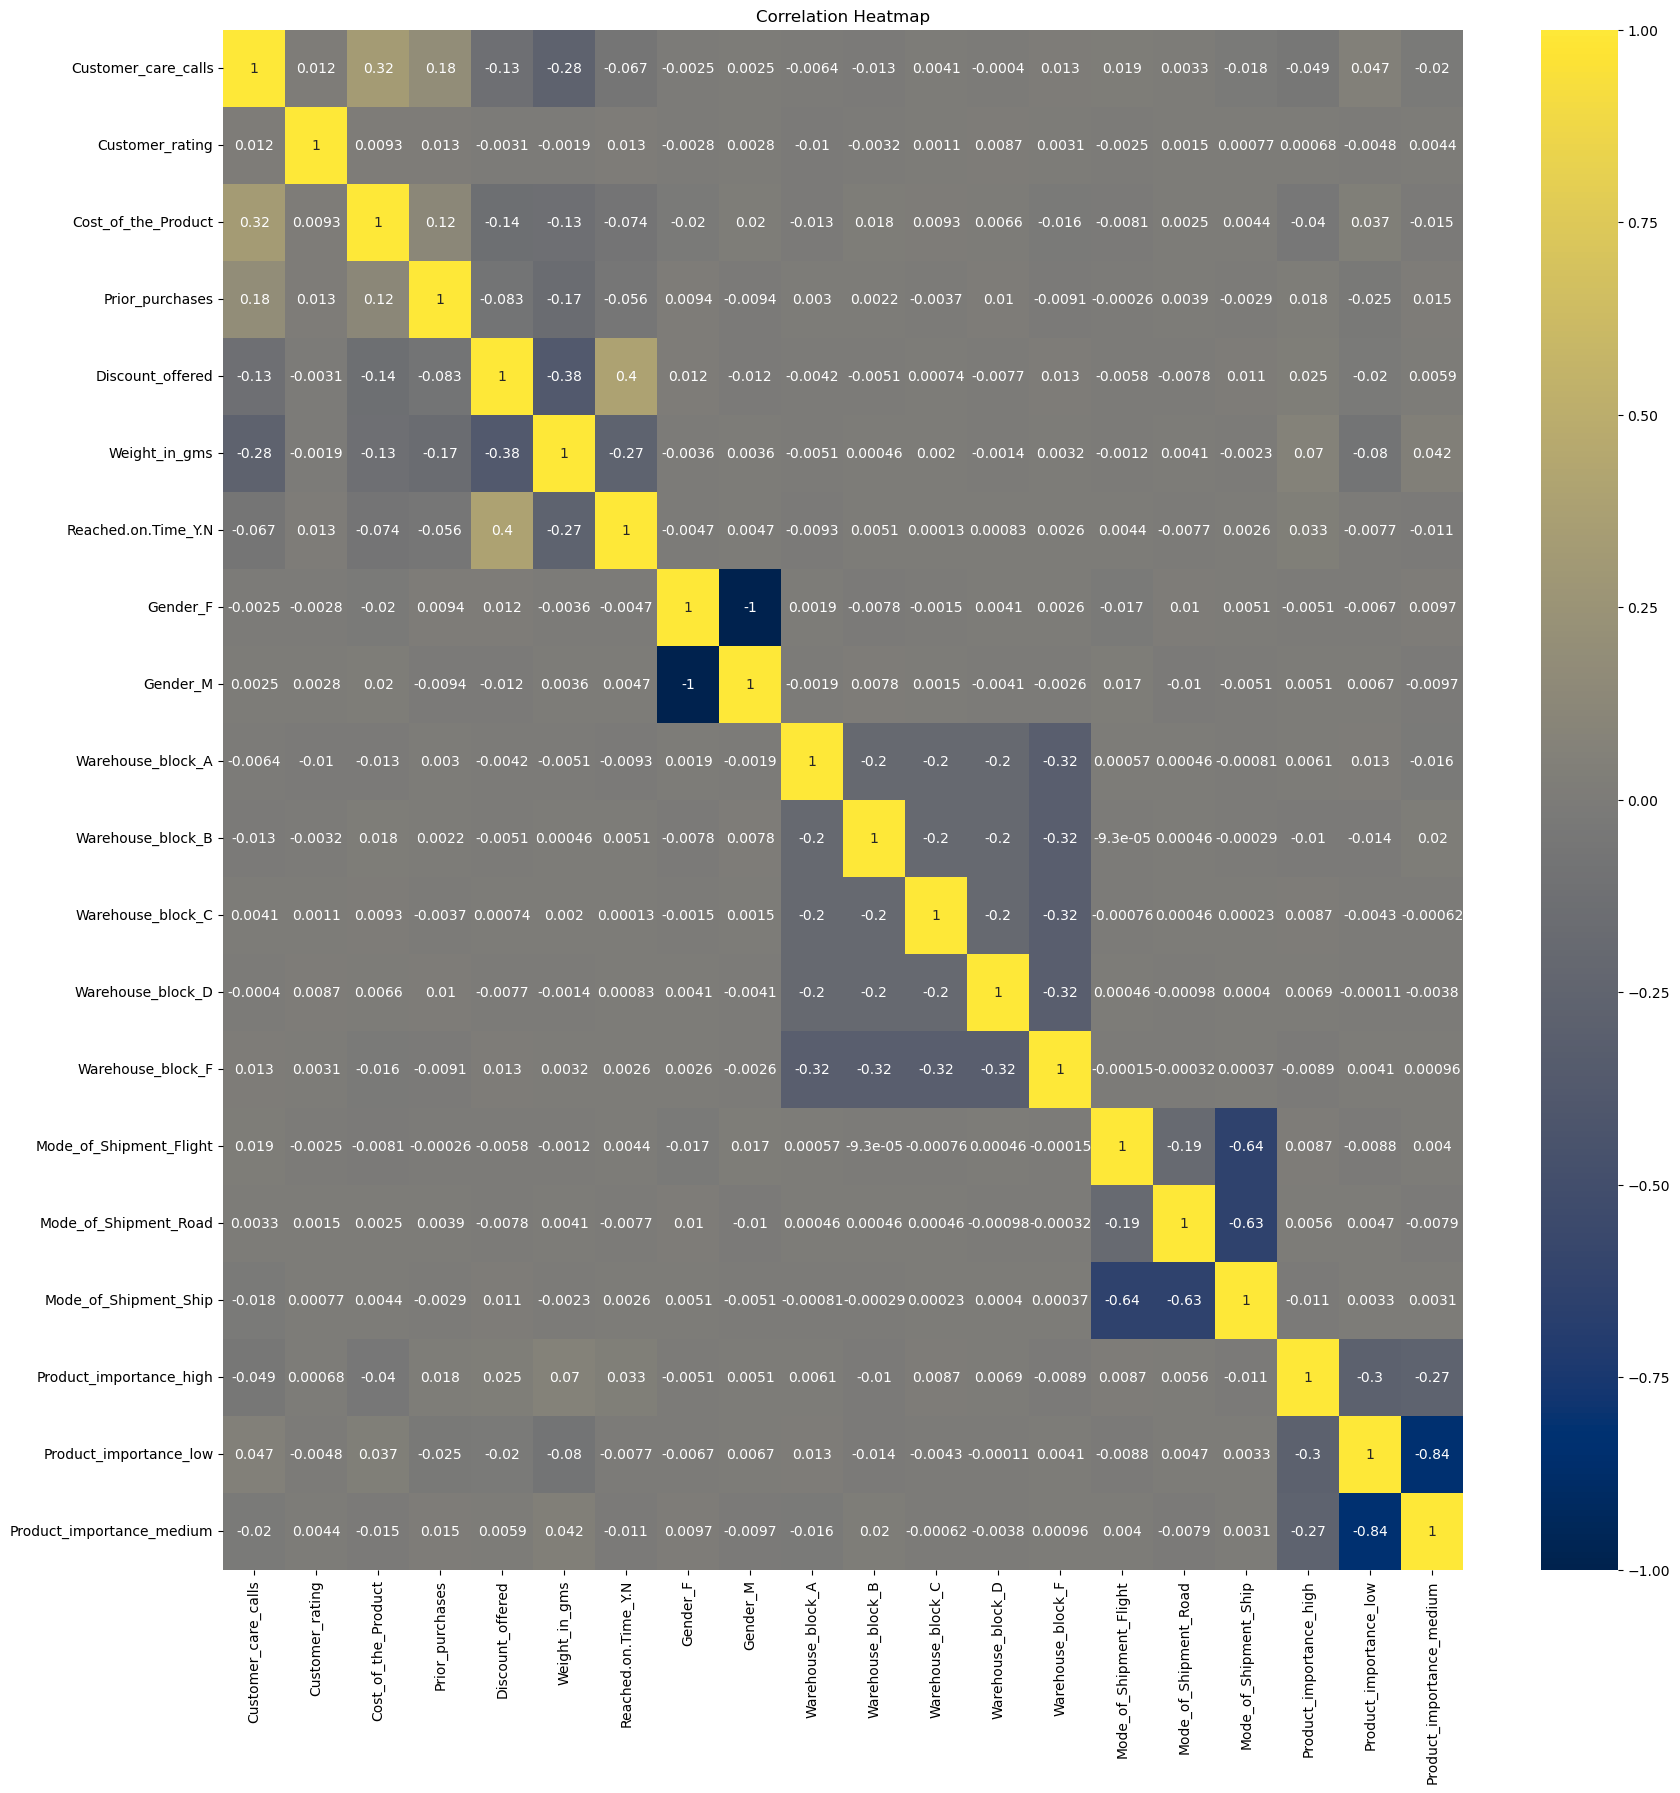

In [32]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="cividis", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
df_encoded.shape

(10999, 20)

In [34]:
df_encoded.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Gender_F', 'Gender_M', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium'],
      dtype='object')

In [35]:
print('Data: \nRows: {} Columns: {}'.format(df_encoded.shape[0], df_encoded.shape[1]))

Data: 
Rows: 10999 Columns: 20


# Train Test Split

In [36]:
x = df_encoded.drop(['Reached.on.Time_Y.N'], axis=1)
y = df_encoded['Reached.on.Time_Y.N']

In [37]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({1: 6563, 0: 4436})


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Hyperparameter tuning

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predict))

Accuracy: 0.6354545454545455
              precision    recall  f1-score   support

           0       0.54      0.59      0.57       887
           1       0.71      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[524, 363],
       [439, 874]], dtype=int64)

# DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_predict))

Accuracy: 0.6427272727272727
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       887
           1       0.70      0.71      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[478, 409],
       [377, 936]], dtype=int64)

# KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_predict))

Accuracy: 0.655
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       887
           1       0.72      0.69      0.71      1313

    accuracy                           0.66      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.66      0.66      2200



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[529, 358],
       [401, 912]], dtype=int64)

# RandomForestClassifier 
</n>Using Possible Hyperparameter Tuning

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

In [46]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [47]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [48]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [49]:
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6736363636363636


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[768, 119],
       [577, 736]], dtype=int64)

# RandomForestClassifier with GridSearchCV 
</n> Using different possible Hyperparameters 

In [51]:
model = RandomForestClassifier()  

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [52]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [53]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_predict = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)

In [54]:
y_predict = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Best Model Accuracy: {accuracy}')

Best Model Accuracy: 0.6836363636363636


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[768, 119],
       [577, 736]], dtype=int64)

# XGBoost (Extreme Gradient Boosting) with GridSearchCV
</n> Using possible Hyperparameters 

In [57]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

In [58]:
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [59]:
y_predict = best_model.predict(x_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_predict))

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 200}
Best Accuracy: 0.6837152436818441
Accuracy: 0.6877272727272727
              precision    recall  f1-score   support

           0       0.57      0.94      0.71       887
           1       0.93      0.52      0.66      1313

    accuracy                           0.69      2200
   macro avg       0.75      0.73      0.69      2200
weighted avg       0.78      0.69      0.68      2200



In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[834,  53],
       [634, 679]], dtype=int64)

# Support Vector Classifier (SVC)

In [61]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='linear', C=1.0, random_state=42)  

svc_classifier.fit(x_train, y_train)

y_predict = svc_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_predict))


Accuracy: 0.6522727272727272
              precision    recall  f1-score   support

           0       0.55      0.83      0.66       887
           1       0.82      0.54      0.65      1313

    accuracy                           0.65      2200
   macro avg       0.68      0.68      0.65      2200
weighted avg       0.71      0.65      0.65      2200



In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[732, 155],
       [610, 703]], dtype=int64)

# OverSampling Data
</n> Using Smote


In [63]:
desired_minority_samples = int(1 * len(x[df_encoded["Reached.on.Time_Y.N"] == 1]) )

In [64]:
desired_minority_samples

6563

In [65]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy=1)

# Apply SMOTE to generate synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)

In [58]:
y_resampled.value_counts()

1    6563
0    6563
Name: Reached.on.Time_Y.N, dtype: int64

In [59]:
df_encoded2 = pd.concat([x_resampled, y_resampled], axis=1, join='inner')
df_encoded2

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Gender_F,Gender_M,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1,0,0,0,0,1,0,1,0,0,0,1,0,1
1,4,5,216,2,59,3088,0,1,0,0,0,0,1,1,0,0,0,1,0,1
2,2,2,183,4,48,3374,0,1,1,0,0,0,0,1,0,0,0,1,0,1
3,3,3,176,4,10,1177,0,1,0,1,0,0,0,1,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,0,0,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,4,1,200,3,4,4753,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13122,3,1,170,2,1,5716,1,0,0,0,0,0,0,0,0,1,0,0,0,0
13123,5,4,241,5,5,1658,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13124,6,3,280,4,4,1295,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
df_encoded2.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Gender_F,Gender_M,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Reached.on.Time_Y.N
count,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000,13126.000000
mean,4.015313,2.930901,210.547615,3.528036,12.045254,3719.363706,0.465945,0.454442,0.143684,0.144599,0.143913,0.143532,0.296130,0.139723,0.137970,0.641551,0.073137,0.442176,0.394027,0.500000
std,1.126036,1.379588,47.868735,1.485452,15.169712,1637.522865,0.498858,0.497939,0.350783,0.351709,0.351015,0.350628,0.456566,0.346712,0.344882,0.479563,0.260372,0.496664,0.488659,0.500019
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,215.000000,3.000000,7.000000,4260.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5107.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
x = df_encoded2.drop(['Reached.on.Time_Y.N'], axis=1)
y = df_encoded2['Reached.on.Time_Y.N']

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression on OverSampled Data  

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_predict))

Accuracy: 0.6812642802741813
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1313
           1       0.69      0.65      0.67      1313

    accuracy                           0.68      2626
   macro avg       0.68      0.68      0.68      2626
weighted avg       0.68      0.68      0.68      2626



# DecisionTreeClassifier on oversampled Data

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_predict))

Accuracy: 0.6942117288651942
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1313
           1       0.70      0.67      0.69      1313

    accuracy                           0.69      2626
   macro avg       0.69      0.69      0.69      2626
weighted avg       0.69      0.69      0.69      2626



# KNN Classifier on OverSampled Data

In [66]:
from sklearn.neighbors import KNeighborsClassifier
k=5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_predict))

Accuracy: 0.6728865194211728
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1313
           1       0.69      0.63      0.66      1313

    accuracy                           0.67      2626
   macro avg       0.67      0.67      0.67      2626
weighted avg       0.67      0.67      0.67      2626



# GridSearchCV with RandomForestClassifier on OverSampled Data
</n>Using Possible Hyperparameter Tuning

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

In [68]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [69]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [70]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [91]:
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_predict))

Accuracy: 0.7204874333587205
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1313
           1       0.76      0.59      0.66      1313

    accuracy                           0.70      2626
   macro avg       0.71      0.70      0.70      2626
weighted avg       0.71      0.70      0.70      2626



# RandomForestClassifier with GridSearchCV OverSampled Data
</n>Using different possible Hyperparameters

In [100]:
model = RandomForestClassifier()  

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [101]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [102]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_predict = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)

In [103]:
y_predict = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)

print("Best Hyperparameters:", grid_search.best_params_)

print(f'Best Model Accuracy: {accuracy}')
print(classification_report(y_test, y_predict))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy: 0.7182025894897182
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1313
           1       0.91      0.49      0.63      1313

    accuracy                           0.72      2626
   macro avg       0.78      0.72      0.70      2626
weighted avg       0.78      0.72      0.70      2626



# XGBoost with GridSearchCV on OverSampled Data
</n>Using possible Hyperparameters

In [76]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

In [77]:
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [78]:
y_predict = best_model.predict(x_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_predict))

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200}
Best Accuracy: 0.739904761904762
Accuracy: 0.7204874333587205
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1313
           1       0.94      0.47      0.63      1313

    accuracy                           0.72      2626
   macro avg       0.79      0.72      0.70      2626
weighted avg       0.79      0.72      0.70      2626



# SVC on OverSampled Data

In [79]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='linear', C=1.0, random_state=42)  

svc_classifier.fit(x_train, y_train)

y_predict = svc_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_predict))


Accuracy: 0.7018278750952018
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1313
           1       0.76      0.59      0.66      1313

    accuracy                           0.70      2626
   macro avg       0.71      0.70      0.70      2626
weighted avg       0.71      0.70      0.70      2626



In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)
#tp fp
#fn tn

array([[1070,  243],
       [ 540,  773]], dtype=int64)

In [81]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
predictions = model.predict(x_test)

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1313
           1       0.77      0.59      0.67      1313

    accuracy                           0.71      2626
   macro avg       0.72      0.71      0.70      2626
weighted avg       0.72      0.71      0.70      2626



In [84]:
import pickle 
from joblib import dump, load

In [85]:
import pickle

with open('C:\BIA\Ecom 2 - Bhagyalakshmi Muske/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [86]:
with open('C:\BIA\Ecom 2 - Bhagyalakshmi Muske/model.pkl', 'rb') as file:
    model = pickle.load(file)


In [87]:
pickle.dump(scaler, open("C:\BIA\Ecom 2 - Bhagyalakshmi Muske/scaler.pickle", "wb"))
sc = pickle.load(open("C:\BIA\Ecom 2 - Bhagyalakshmi Muske/scaler.pickle", "rb"))

In [88]:
sample = sc.transform([x_test[0]])
sample

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.78426474, -1.56410383, -4.38970334, -2.61443897, -0.59521933,
        -2.27024793, -2.81092821,  1.29332621, -1.57751059, -1.57866428,
        -1.57174277,  6.5295446 , -2.07808962,  6.80008973, -1.56539895,
        -4.12530418, -1.36352578, -2.68021314,  1.72555729]])

In [89]:
model.predict(sample)

array([1], dtype=int64)

In [94]:
y_test[0]

1

In [ ]:
print(len(y_test))
print(y_test)


In [93]:
#y_test = y_test.reset_index(drop=True)


In [ ]:
#from sklearn.model_selection import cross_val_score

#model = XGBClassifier()  

#scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

#print("Accuracy for each fold:", scores)
#print("Mean Accuracy:", np.mean(scores))


In [ ]:
#df.to_csv('modeldataset_new.csv', index=False)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix